In [7]:
%matplotlib inline
from IPython import display
import torch
from matplotlib import pyplot as plt
import random

# Генерируем данные

In [3]:
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features = torch.randn((num_examples, num_inputs))
labels = torch.mv(features,true_w) + true_b
labels += torch.randn(labels.shape)

In [4]:
features

tensor([[-0.7139, -1.2212],
        [ 0.7651,  1.0359],
        [ 0.0588,  0.4744],
        ...,
        [-0.4038, -0.4137],
        [ 1.0805,  0.8596],
        [-0.6741, -0.0457]])

# Визуализируем данные

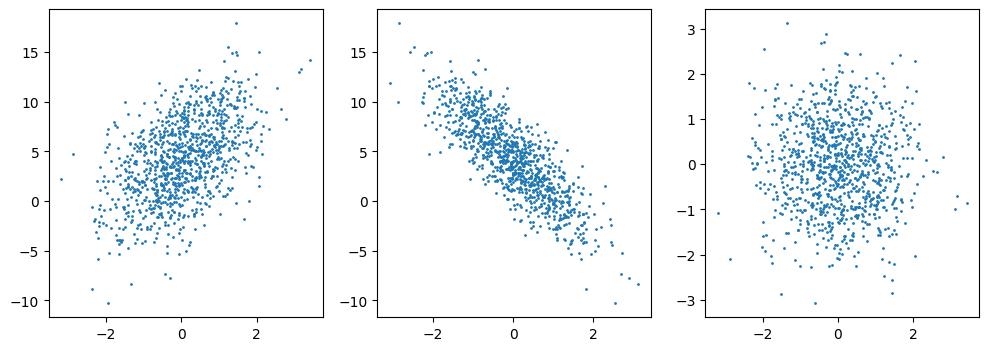

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(features[:,0],labels,1)
plt.subplot(132)
plt.scatter(features[:,1],labels,1)
plt.subplot(133)
plt.scatter(features[:,0],features[:,1],1)
plt.show()

# Чтение данных 

In [16]:
import random
def data_iter(batch_size,features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0,num_examples,batch_size):
    j = indices[i:min(i+batch_size,num_examples)]
    yield features[j,:],labels[j]
    

In [17]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
  print(X,'\n',y)
  break

tensor([[ 1.4520, -2.5730],
        [-0.2640,  1.4386],
        [-0.2293, -0.0066],
        [-0.5427, -0.2449],
        [-0.0703,  1.7496],
        [ 1.0528, -0.8875],
        [-0.5263, -1.3277],
        [-1.4287, -1.8500],
        [-0.5500, -1.7711],
        [-1.5068, -2.8686]]) 
 tensor([15.0713, -1.3596,  3.4159,  4.2106, -3.1691, 10.1038,  7.6589,  8.7660,
        10.6783, 10.0122])


# Создание модель для обучения

In [18]:
w = torch.randn((num_inputs))
b = torch.zeros((1,))

In [19]:
w.requires_grad_()
b.requires_grad_()

tensor([0.], requires_grad=True)

# Практика 

In [20]:
def linreg(X,w,b):
  return torch.mv(X,w) + b 

# Обучение

In [26]:
def squared_loss(y_hay,y):
  return ((y_hay-y.reshape(y_hay.shape))**2).mean()

In [28]:
def sgd(params,lr):
  for param in params:
    param.data[:] = param - lr*param.grad

In [34]:
lr = 0.01
num_epochs = 10
for epoch in range(num_epochs):
  for X,y in data_iter(batch_size,features,labels):
    w = w.detach()
    b = b.detach()
    w.requires_grad_()
    b.requires_grad_()
    l = squared_loss(linreg(X,w,b),y)
    l.backward()
    sgd([w,b],lr)
  train_l = squared_loss(linreg(features,w,b),labels)
  print('epoch %d, loss %f ' %(epoch + 1,train_l.mean().item()))
  

epoch 1, loss 0.987051 
epoch 2, loss 0.987436 
epoch 3, loss 0.987184 
epoch 4, loss 0.987777 
epoch 5, loss 0.986852 
epoch 6, loss 0.987161 
epoch 7, loss 0.988112 
epoch 8, loss 0.988339 
epoch 9, loss 0.988921 
epoch 10, loss 0.987060 


# Оценка качества

In [38]:
print('Error in estimating w',true_w-w.reshape(true_w.shape))
print('Error in estimating b',true_b - b)
print(w)
print(b)

Error in estimating w tensor([-0.0190,  0.0438], grad_fn=<SubBackward0>)
Error in estimating b tensor([0.0356], grad_fn=<RsubBackward1>)
tensor([ 2.0190, -3.4438], requires_grad=True)
tensor([4.1644], requires_grad=True)


# Линейная регрессия torch

In [40]:
from torch.utils.data import TensorDataset, DataLoader

In [41]:
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features = torch.randn((num_examples, num_inputs))
labels = torch.mv(features,true_w) + true_b
labels += torch.randn(labels.shape)

In [45]:
batch_size = 10
dataset = TensorDataset(features,labels)

data_iter = DataLoader(dataset,batch_size,shuffle= True)
for X,y in data_iter:
  print(X,y)
  break

tensor([[-0.1562,  0.2684],
        [ 0.0451,  0.0235],
        [ 2.1131,  0.7283],
        [ 0.0963, -0.4339],
        [-0.2941, -0.4985],
        [-0.5032, -0.7332],
        [-0.7420, -0.2675],
        [-0.9193, -0.6187],
        [-0.0758, -0.7192],
        [ 1.5019,  0.1920]]) tensor([1.9628, 2.8270, 5.1454, 5.8093, 4.5905, 5.0692, 4.2657, 4.8526, 7.5672,
        7.3737])


In [46]:
model = torch.nn.Sequential(torch.nn.Linear(2,1))

In [47]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [49]:
model[0].weight.data= true_w.clone().detach().requires_grad_(True).reshape((1,2))
model[0].bias.data = torch.tensor([true_b],requires_grad=True)

In [50]:
loss = torch.nn.MSELoss(reduction='mean')

In [51]:
trainer = torch.optim.SGD(model.parameters(),lr=0.001)

In [52]:
zzz = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])

In [54]:
labels.shape

torch.Size([1000])

In [62]:
model(zzz).shape

torch.Size([3, 1])

In [60]:
model(zzz).reshape(3)

tensor([-0.6000, -3.4000, -6.2000], grad_fn=<ReshapeAliasBackward0>)

In [65]:
batch_size = 100
for epoch in range(1, 100+1):
  for X,y in data_iter:
    trainer.zero_grad()
    l = loss(model(X).reshape(-1),y)
    l.backward()
    trainer.step()
  l = loss(model(features).reshape(-1),labels)
  if epoch % 5 == 0 :
    print('epoch %d, loss %f' % (epoch,l.item()), '|\tw',model[0].weight.data,'|\tb',model[0].bias.data)


epoch 5, loss 0.950540 |	w tensor([[ 2.0469, -3.4160]]) |	b tensor([4.1333])
epoch 10, loss 0.950531 |	w tensor([[ 2.0481, -3.4160]]) |	b tensor([4.1321])
epoch 15, loss 0.950528 |	w tensor([[ 2.0478, -3.4159]]) |	b tensor([4.1305])
epoch 20, loss 0.950527 |	w tensor([[ 2.0478, -3.4168]]) |	b tensor([4.1303])
epoch 25, loss 0.950527 |	w tensor([[ 2.0480, -3.4171]]) |	b tensor([4.1308])
epoch 30, loss 0.950526 |	w tensor([[ 2.0486, -3.4160]]) |	b tensor([4.1302])
epoch 35, loss 0.950527 |	w tensor([[ 2.0480, -3.4166]]) |	b tensor([4.1297])
epoch 40, loss 0.950526 |	w tensor([[ 2.0486, -3.4166]]) |	b tensor([4.1304])
epoch 45, loss 0.950526 |	w tensor([[ 2.0479, -3.4166]]) |	b tensor([4.1302])
epoch 50, loss 0.950526 |	w tensor([[ 2.0485, -3.4169]]) |	b tensor([4.1301])
epoch 55, loss 0.950526 |	w tensor([[ 2.0487, -3.4160]]) |	b tensor([4.1302])
epoch 60, loss 0.950526 |	w tensor([[ 2.0486, -3.4173]]) |	b tensor([4.1297])
epoch 65, loss 0.950527 |	w tensor([[ 2.0494, -3.4172]]) |	b tens

In [67]:
w = model[0].weight.data
print(f'Error w',true_w.reshape(w.shape)-w)
b = model[0].bias.data
print('Error', true_b-b)

Error w tensor([[-0.0481,  0.0168]])
Error tensor([0.0697])


In [73]:
import numpy as np

def mse_loss(y_true, y_pred):
    # Расчет среднеквдратичного отклонения
    mse = np.mean((y_true - y_pred)**2)
    return mse

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Инициализация случайных весов
    weights = np.random.randn(X.shape[1])
    # Цикл обучения
    for epoch in range(1, epochs + 1):
        # Создание предсказания
        y_pred = np.dot(X, weights)
        # Расчет ошибки
        loss = mse_loss(y, y_pred)
        # Градиентный спуск
        grad = np.dot(2*X.T, (y_pred - y)) / y.size
        weights -= learning_rate * grad
        # Вывод прогресса
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")
    return weights, loss

# Параметры
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 7, 11])
learning_rate = 0.01
epochs = 1000

# Градиентный спуск
weights, loss = gradient_descent(X, y, learning_rate, epochs)

# Вывод результатов
print(f"Значения весов: {weights}")
print(f"Final Loss: {loss:.4f}")


Epoch 100/1000 - Loss: 0.0169
Epoch 200/1000 - Loss: 0.0119
Epoch 300/1000 - Loss: 0.0083
Epoch 400/1000 - Loss: 0.0059
Epoch 500/1000 - Loss: 0.0041
Epoch 600/1000 - Loss: 0.0029
Epoch 700/1000 - Loss: 0.0020
Epoch 800/1000 - Loss: 0.0014
Epoch 900/1000 - Loss: 0.0010
Epoch 1000/1000 - Loss: 0.0007
Значения весов: [0.92996053 1.05529218]
Final Loss: 0.0007


In [74]:
import numpy as np

def mse_loss(y_true, y_pred):
    # Расчет среднеквдратичного отклонения
    mse = np.mean((y_true - y_pred)**2)
    return mse

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Инициализация случайных весов
    weights = np.random.randn(X.shape[1])
    # Цикл обучения
    for epoch in range(1, epochs + 1):
        # Создание предсказания
        y_pred = np.dot(X, weights)
        # Расчет ошибки
        loss = mse_loss(y, y_pred)
        # Градиентный спуск
        grad = np.dot(2*X.T, (y-y_pred)) / y.size
        weights -= learning_rate * grad
        # Вывод прогресса
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")
    return weights, loss

# Параметры
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 7, 11])
learning_rate = 0.01
epochs = 1000

# Градиентный спуск
weights, loss = gradient_descent(X, y, learning_rate, epochs)

# Вывод результатов
print(f"Значения весов: {weights}")
print(f"Final Loss: {loss:.4f}")


Epoch 100/1000 - Loss: 4784403566919251037450781545098082944811008.0000
Epoch 200/1000 - Loss: 588303976176738751893069216040551634380746915233814901315886345454314996956760375296.0000
Epoch 300/1000 - Loss: 72339543172822508500967234392768190521438759037180253683224358872124398255395636688554355141337411757911881766638966018146304.0000
Epoch 400/1000 - Loss: 8895077576155182122115222181546940329129968065283250853376363054412022537472022041819537413047079235555526487709230008342661827045655149243891077841751623049112715264.0000
Epoch 500/1000 - Loss: 1093764234822325207243522001613929209222753746087790190708261709004011314180650891323244984341133974190159096025010261617692998583051069002271617468778688934617457156006966576105829693564853468416144471752704.0000
Epoch 600/1000 - Loss: 13449238538215945326901136826996677828752374737256887705617000020560965520416403568467026954135540287907788168793798798146716695246042976846325754821185965586331703825818366527749721128679759981027093622967

/tmp/ipykernel_1869488/4078892769.py:5: RuntimeWarning: overflow encountered in square
  mse = np.mean((y_true - y_pred)**2)
